In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
M = np.load("../notebooks/M.npy")
M_ = np.load("../notebooks/M.npy")
tags = np.load("../notebooks/tags.npy")
tags

array(['CE_chi00_alpha02', 'CE_chi00_alpha05', 'CE_chi00_alpha10',
       'CE_chi00_alpha20', 'CE_chi00_alpha50', 'CE_chi01_alpha02',
       'CE_chi01_alpha05', 'CE_chi01_alpha10', 'CE_chi01_alpha20',
       'CE_chi01_alpha50', 'CE_chi02_alpha02', 'CE_chi02_alpha05',
       'CE_chi02_alpha10', 'CE_chi02_alpha20', 'CE_chi02_alpha50',
       'CE_chi05_alpha02', 'CE_chi05_alpha05', 'CE_chi05_alpha10',
       'CE_chi05_alpha20', 'CE_chi05_alpha50', 'CHE_chi00', 'CHE_chi01',
       'CHE_chi02', 'CHE_chi05', 'GC_chi00', 'GC_chi01', 'GC_chi02',
       'GC_chi05', 'NSC_chi00', 'NSC_chi01', 'NSC_chi02', 'NSC_chi05',
       'SMT_chi00', 'SMT_chi01', 'SMT_chi02', 'SMT_chi05'], dtype='<U16')

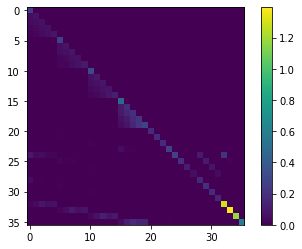

In [3]:
c = plt.imshow(M) #not symmetric, but it needs to be. computation is stable, so just reflect where it needs to be
plt.colorbar(c)

In [4]:
# sanity check to justify above
Mprime = np.multiply(M, M.T)
for i in range(len(Mprime)):
    Mprime[i, i] = 0
np.sum(Mprime)

0.0

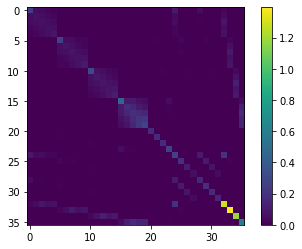

In [5]:
#make it symmetric. all values are nonnegative, so zero entries mean that computation for that cell was not done
for i in range(len(M)):
    for j in range(len(M)):
        value = max(M[i, j], M[j, i])
        M[i, j] = value
        M[j, i] = value
        
c = plt.imshow(M)
plt.colorbar(c)

In [6]:
# sets of possible combinations of channels
valid_sets = []
for chi in ["00", "01", "02", "05"]:
    models = []
    for base in ["CHE", "NSC", "SMT", "GC"]:
        models.append(f"{base}_chi{chi}")
        
    for alpha in ["02", "05", "10", "20", "50"]:
        models_ = models[:] #copy
        models_.append(f"CE_chi{chi}_alpha{alpha}")
        valid_sets.append(models_[:])

for elem in valid_sets:
    print(elem)

['CHE_chi00', 'NSC_chi00', 'SMT_chi00', 'GC_chi00', 'CE_chi00_alpha02']
['CHE_chi00', 'NSC_chi00', 'SMT_chi00', 'GC_chi00', 'CE_chi00_alpha05']
['CHE_chi00', 'NSC_chi00', 'SMT_chi00', 'GC_chi00', 'CE_chi00_alpha10']
['CHE_chi00', 'NSC_chi00', 'SMT_chi00', 'GC_chi00', 'CE_chi00_alpha20']
['CHE_chi00', 'NSC_chi00', 'SMT_chi00', 'GC_chi00', 'CE_chi00_alpha50']
['CHE_chi01', 'NSC_chi01', 'SMT_chi01', 'GC_chi01', 'CE_chi01_alpha02']
['CHE_chi01', 'NSC_chi01', 'SMT_chi01', 'GC_chi01', 'CE_chi01_alpha05']
['CHE_chi01', 'NSC_chi01', 'SMT_chi01', 'GC_chi01', 'CE_chi01_alpha10']
['CHE_chi01', 'NSC_chi01', 'SMT_chi01', 'GC_chi01', 'CE_chi01_alpha20']
['CHE_chi01', 'NSC_chi01', 'SMT_chi01', 'GC_chi01', 'CE_chi01_alpha50']
['CHE_chi02', 'NSC_chi02', 'SMT_chi02', 'GC_chi02', 'CE_chi02_alpha02']
['CHE_chi02', 'NSC_chi02', 'SMT_chi02', 'GC_chi02', 'CE_chi02_alpha05']
['CHE_chi02', 'NSC_chi02', 'SMT_chi02', 'GC_chi02', 'CE_chi02_alpha10']
['CHE_chi02', 'NSC_chi02', 'SMT_chi02', 'GC_chi02', 'CE_chi02_al

First do the sanity check with all distributions known, checking the total error

In [7]:
# first sanity check, just use all the formation channels. 
# since the dot products are pre-computed, it should work perfectly
for valid_set in valid_sets:
    bfs = np.random.uniform(0, 1, 5)
    bfs /= np.sum(bfs)
    
    #obtain a reduced version of M for this calculation
    Ms = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            a = np.where(tags==valid_set[i])
            b = np.where(tags == valid_set[j])
            Ms[i, j] =  M[a, b]
    
    #assuming converged calculation, this is correct
    R = np.zeros(5)
    for i in range(5):
        for j in range(5):
            R[i] += bfs[j]*Ms[i, j]
    
    
    soln = np.linalg.solve(Ms, R)
    
    print("absolute error:", np.sum(np.abs(soln-bfs)))

absolute error: 1.249000902703301e-16
absolute error: 6.38378239159465e-16
absolute error: 8.326672684688674e-17
absolute error: 1.942890293094024e-16
absolute error: 7.632783294297951e-17
absolute error: 1.1102230246251565e-16
absolute error: 5.551115123125783e-17
absolute error: 1.3877787807814457e-16
absolute error: 8.326672684688674e-17
absolute error: 1.3877787807814457e-16
absolute error: 8.326672684688674e-17
absolute error: 3.3306690738754696e-16
absolute error: 1.3877787807814457e-16
absolute error: 2.7755575615628914e-16
absolute error: 1.1102230246251565e-16
absolute error: 2.0816681711721685e-16
absolute error: 1.249000902703301e-16
absolute error: 1.5959455978986625e-16
absolute error: 1.1102230246251565e-16
absolute error: 1.8041124150158794e-16


/tmp/ipykernel_11887/2152130444.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ms[i, j] =  M[a, b]


Now do a check where one of the formation channels is removed from the known set, but maintained in the observed distribution

In [8]:
for valid_set in valid_sets[12:13]: #Just a random example
    print(valid_set)
    bfs = np.random.uniform(0, 1, 5)
    bfs /= np.sum(bfs)
    
    #obtain a reduced version of M for this calculation
    Ms = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            a = np.where(tags==valid_set[i])
            b = np.where(tags == valid_set[j])
            Ms[i, j] =  M[a, b]
            
    for removed_channel in [0, 1, 2, 3, 4]:
        all_channels = [0, 1, 2, 3, 4]
        all_channels.remove(removed_channel)
        reduced_channels = all_channels
        R = np.zeros(5)
        for i in reduced_channels: #
            for j in range(5):
                R[i] += bfs[j]*Ms[i, j]

        R = R[np.where(R!=0)] #unchanged entry is always zero, so remove it

        # now reduce M by removing the "unknown channel"

        Msr = np.zeros((4, 4))
        for i_, i in enumerate(reduced_channels):
            for j_, j in enumerate(reduced_channels):
                Msr[i_, j_] = Ms[i, j]

        soln = np.linalg.solve(Msr, R)
        padded_soln = np.zeros(5)
        for i_, i in enumerate(reduced_channels):
            padded_soln[i] = soln[i_]
        print(bfs, np.sum(bfs) - bfs[removed_channel])
        print(padded_soln, np.sum(padded_soln))
        print()


['CHE_chi02', 'NSC_chi02', 'SMT_chi02', 'GC_chi02', 'CE_chi02_alpha10']
[0.11902553 0.1627356  0.20605785 0.25625359 0.25592744] 0.8809744746242154
[0.         0.16275305 0.20601013 0.25624424 0.25644236] 0.8814497840789134

[0.11902553 0.1627356  0.20605785 0.25625359 0.25592744] 0.8372644042688946
[0.11904143 0.         0.20599266 0.36778548 0.25350586] 0.9463254356762631

[0.11902553 0.1627356  0.20605785 0.25625359 0.25592744] 0.793942153534514
[0.11853504 0.16200035 0.         0.25539753 0.54238567] 1.0783185812104756

[0.11902553 0.1627356  0.20605785 0.25625359 0.25592744] 0.7437464103795313
[0.11901642 0.28192097 0.20597674 0.         0.26431237] 0.8712265103367234

[0.11902553 0.1627356  0.20605785 0.25625359 0.25592744] 0.7440725571928447
[0.11950116 0.16028098 0.23180012 0.26420713 0.        ] 0.7757893895113216



/tmp/ipykernel_11887/2969327263.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ms[i, j] =  M[a, b]


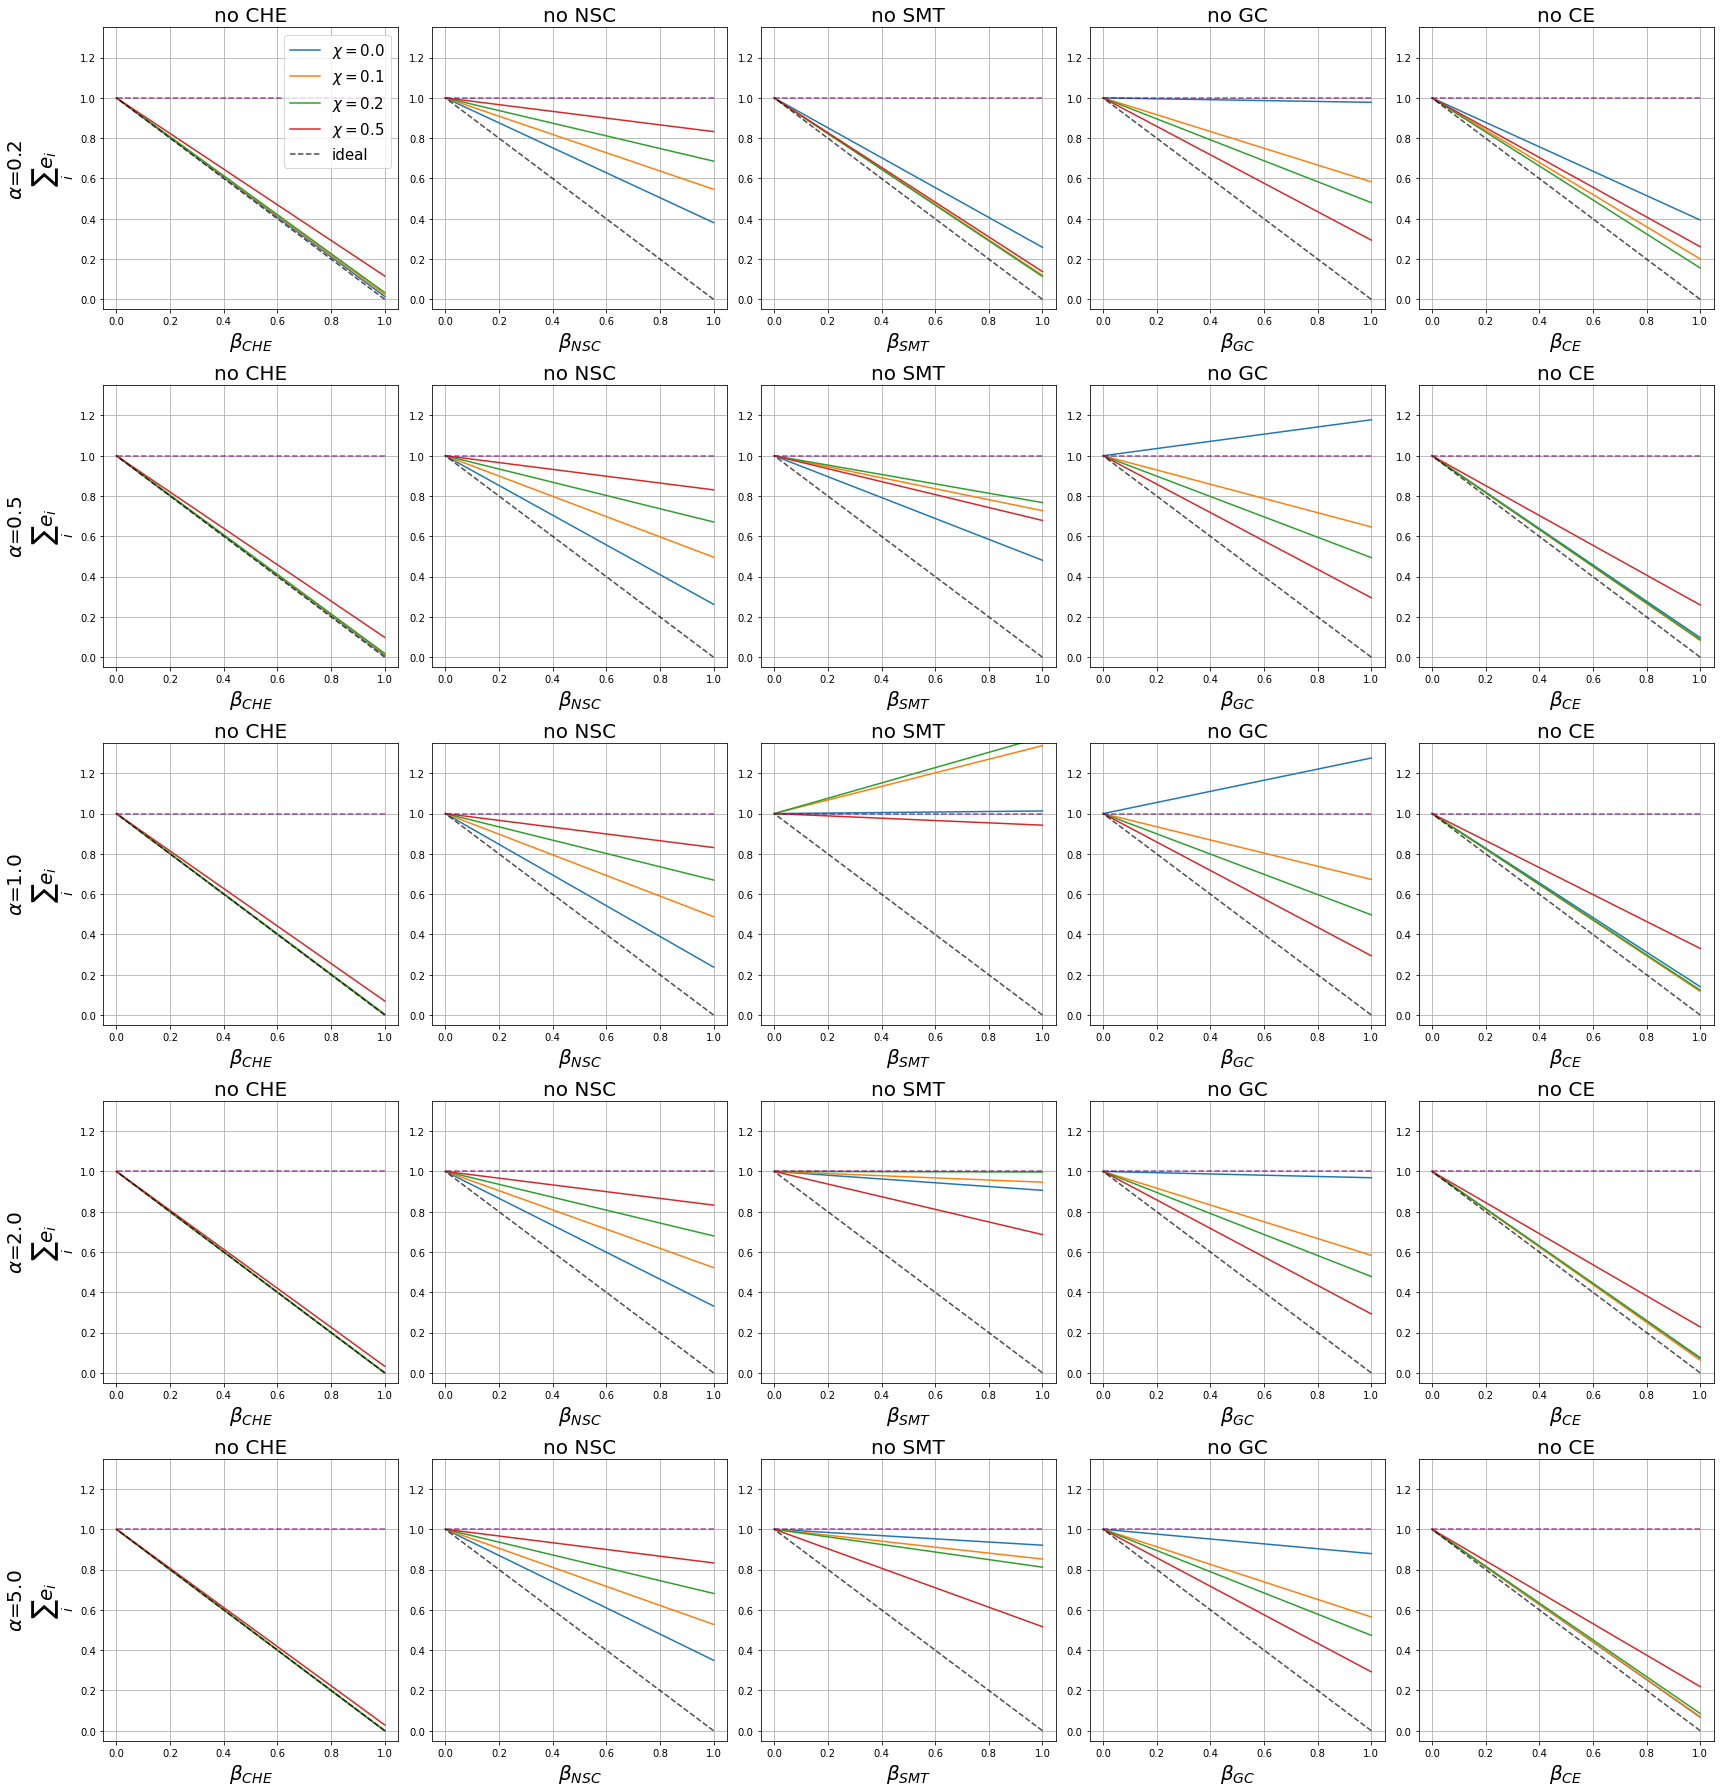

In [23]:
# make the plot for the paper
#alpha = "05" #fix this at something
fig, axs = plt.subplots(5, 5, figsize=(24, 10*2.5))
channel_tags = ["CHE", "NSC", "SMT", "GC", "CE"]
#for ai, alpha in enumerate(["02", "05", "10", "20", "50"]):
for ai, alpha in enumerate(["02", "05", "10", "20", "50"]):
    alpha_mod = f"{alpha[0]}.{alpha[1]}"

    ylabel = r"$\alpha$={alpha_val}".format(alpha_val=alpha_mod) + "\n" + r"$\sum_i e_i$"
    axs[ai, 0].set_ylabel(ylabel, fontsize=20)
    for chi in ['00', '01', '02', '05']:
        chi_mod = f"{chi[0]}.{chi[1]}"
        valid_set = [f'CHE_chi{chi}', f'NSC_chi{chi}', f'SMT_chi{chi}', f'GC_chi{chi}', f'CE_chi{chi}_alpha{alpha}']

        #obtain a reduced version of M for this calculation
        Ms = np.zeros((5, 5))
        for i in range(5):
            for j in range(5):
                a = np.where(tags==valid_set[i])
                b = np.where(tags == valid_set[j])
                Ms[i, j] =  M[a, b].sum() #same as [0], there's only one element. but some weird warning is being thrown



        for removed_channel in [0, 1, 2, 3, 4]:
            axs[ai, removed_channel].set_title(f"no {channel_tags[removed_channel]}", fontsize=20)
            xlabel = r"$\beta_{{{}}}$".format(channel_tags[removed_channel])
            #xlabel = r"$\beta$" + 
            axs[ai, removed_channel].set_xlabel(xlabel, fontsize=20)
            all_channels = [0, 1, 2, 3, 4]
            all_channels.remove(removed_channel)
            reduced_channels = all_channels

            Msr = np.zeros((4, 4))
            for i_, i in enumerate(reduced_channels):
                for j_, j in enumerate(reduced_channels):
                    Msr[i_, j_] = Ms[i, j]

            bfr = np.linspace(0, 1, 100) # branching fraction of the removed channel
            bfs = np.zeros((100, 5))
            bfs[:, removed_channel] = bfr

            for elem in reduced_channels:
                for k in range(100):
                    bfs[k, elem] = (1-bfr[k])/4

            results = np.zeros(100)

            for k in range(100):
                R = np.zeros(5)
                for i in reduced_channels: #
                    for j in range(5):
                        R[i] += bfs[k, j]*Ms[i, j]

                R = R[np.where(R!=0)] #unchanged entry is always zero, so remove it

                # now reduce M by removing the "unknown channel"

                soln = np.linalg.solve(Msr, R)
    #             padded_soln = np.zeros(5)
    #             for i_, i in enumerate(reduced_channels):
    #                 padded_soln[i] = soln[i_]
    #             print(bfs, np.sum(bfs) - bfs[removed_channel])
    #             print(padded_soln, np.sum(padded_soln))

                results[k] = (np.sum(soln))


            #do the actual plotting
            axs[ai, removed_channel].plot(bfr, results, label = r"$\chi={chi_mod}$".format(chi_mod=chi_mod))
            

    for removed_channel in [0, 1, 2, 3, 4]:
        axs[ai, removed_channel].plot([1, 0], [0, 1], "--", label = "ideal", c="black", alpha=0.7)
        axs[ai, removed_channel].plot([1, 0], [1, 1], "--", label = "", c="purple", alpha=0.7)
        if ai + removed_channel == 0: #only do it for the top left
            axs[ai, removed_channel].legend(fontsize=15)
        axs[ai, removed_channel].set_ylim(-0.05, 1.35)
        axs[ai, removed_channel].grid()
        
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
fig.tight_layout()
plt.savefig("biasing_plot.pdf", dpi=300)